In [40]:
import openpyxl
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")
#pulzia dati e creazione file csv
def force_to_numeric(dataframe1, dataframe2, dataframe3):
    cols = ['2023', '2022', '2021', '2020', '2019', '2018']
    dataframe1[cols] = dataframe1[cols].apply(pd.to_numeric, errors='coerce')
    dataframe2[cols] = dataframe2[cols].apply(pd.to_numeric, errors='coerce')
    dataframe3[cols] = dataframe3[cols].apply(pd.to_numeric, errors='coerce')
    
    return dataframe1, dataframe2, dataframe3



def column_remove(dataframe1, dataframe2, dataframe3):
    dataframe1 = dataframe1.iloc[:, :7]
    dataframe2 = dataframe2.iloc[:, :7]
    dataframe3 = dataframe3.iloc[:, :7]

    return dataframe1, dataframe2, dataframe3

def generate_overall_trend_correlation(df1: pd.DataFrame, df2: pd.DataFrame) -> None:
    """
    Calculates the correlation between the differences in values for each column of two input dataframes and prints the results.

    Args:
        df1 (pd.DataFrame): The first input dataframe.
        df2 (pd.DataFrame): The second input dataframe.

    Returns:
        None: The function only prints the correlation matrices for each column.
    """
    common_columns = df1.columns.intersection(df2.columns)
    for column in common_columns:
        diff_df1 = df1[column].diff().dropna()
        diff_df2 = df2[column].diff().dropna()

        merged_diff_df = pd.concat([diff_df1, diff_df2], axis=1)
        correlation = merged_diff_df.corr()
        print(f'Correlation in trend for {column}:\n', correlation)

def generate_yearly_correlations(df1: pd.DataFrame, df2: pd.DataFrame) -> None:
    """
    Calculates the correlation between columns of two input dataframes and prints the results.

    Args:
        df1 (pd.DataFrame): The first input dataframe.
        df2 (pd.DataFrame): The second input dataframe.

    Returns:
        None: The function only prints the correlation matrices for each common column.
    """
    common_columns = df1.columns.intersection(df2.columns)
    for column in common_columns:
        merged_df = pd.concat([df1[column], df2[column]], axis=1)
        correlation = merged_df.corr()
        print(f'Correlation for {column}:\n', correlation)




#education science and research
df_total_research_fundings = pd.read_excel("../data/education_science_research/total_research_funding.xlsx", skiprows=18)
df_men_research_fundings = pd.read_excel("../data/education_science_research/men_research_funding.xlsx", skiprows=18)
df_women_research_fundings = pd.read_excel("../data/education_science_research/women_research_funding.xlsx", skiprows=18)
df_total_research_fundings.to_csv("../data/education_science_research/total_research_funding.csv", index=False)
df_men_research_fundings.to_csv("../data/education_science_research/men_research_funding.csv", index=False)
df_women_research_fundings.to_csv("../data/education_science_research/women_research_funding.csv", index=False)
df_total_research_fundings = df_total_research_fundings
df_men_research_fundings = df_men_research_fundings
df_women_research_fundings = df_women_research_fundings

#environment and climate change
df_total_political_executives = pd.read_excel("../data/environment_climate_change/total_political_executives_climate.xlsx", skiprows=18)
df_men_political_executives = pd.read_excel("../data/environment_climate_change/men_political_executives_climate.xlsx", skiprows=18)
df_women_political_executives = pd.read_excel("../data/environment_climate_change/women_political_executives_climate.xlsx", skiprows=18)
df_total_political_executives.to_csv("../data/environment_climate_change/total_political_executives_climate.csv", index=False)
df_men_political_executives.to_csv("../data/environment_climate_change/men_political_executives_climate.csv", index=False)
df_women_political_executives.to_csv("../data/environment_climate_change/women_political_executives_climate.csv", index=False)
df_total_political_executives = df_total_political_executives
df_men_political_executives = df_men_political_executives
df_women_political_executives = df_women_political_executives

#major political party leaders
df_total_political_parties = pd.read_excel("../data/major_political_party_leaders/total_political_parties.xlsx", skiprows=18)
df_men_political_parties = pd.read_excel("../data/major_political_party_leaders/men_political_parties.xlsx", skiprows=18)
df_women_political_parties = pd.read_excel("../data/major_political_party_leaders/women_political_parties.xlsx", skiprows=18)
df_total_political_parties.to_csv("../data/major_political_party_leaders/total_political_parties.csv", index=False)
df_men_political_parties.to_csv("../data/major_political_party_leaders/men_political_parties.csv", index=False)
df_women_political_parties.to_csv("../data/major_political_party_leaders/women_political_parties.csv", index=False)
df_total_political_parties = df_total_political_parties
df_men_political_parties = df_men_political_parties
df_women_political_parties = df_women_political_parties



#public EU administrations
df_public_adm_total = pd.read_excel("../data/European_public_admin/european_agencies_total.xlsx", skiprows=18)
df_public_adm_men = pd.read_excel("../data/European_public_admin/european_agencies_men.xlsx", skiprows=18)
df_public_adm_women = pd.read_excel("../data/European_public_admin/european_agencies_women.xlsx", skiprows=18)
df_public_adm_total.to_csv("../data/European_public_admin/european_agencies_total.csv", index=False)
df_public_adm_men.to_csv("../data/European_public_admin/european_agencies_men.csv", index=False)
df_public_adm_women.to_csv("../data/European_public_admin/european_agencies_women.csv", index=False)
df_public_adm_total = df_public_adm_total
df_public_adm_men = df_public_adm_men
df_public_adm_women = df_public_adm_men

#european courts
df_total_european_court = pd.read_excel("../data/european_courts/total_judges_european_court.xlsx", skiprows=18)
df_men_european_court = pd.read_excel("../data/european_courts/men_judges_european_court.xlsx", skiprows=18)
df_women_european_court = pd.read_excel("../data/european_courts/women_judges_european_court.xlsx", skiprows=18)
df_total_european_court.to_csv("../data/european_courts/total_judges_european_court.csv", index=False)
df_men_european_court.to_csv("../data/european_courts/men_judges_european_court.csv", index=False)
df_women_european_court.to_csv("../data/european_courts/women_judges_european_court.csv", index=False)
df_total_european_court = df_total_european_court
df_men_european_court = df_men_european_court
df_women_european_court = df_women_european_court

#european finance
df_european_financial_institutions_total = pd.read_excel("../data/European_finance/european_financial_institutions_total.xlsx", skiprows=18)
df_european_financial_institutions_men = pd.read_excel("../data/European_finance/european_financial_institutions_men.xlsx", skiprows=18)
df_european_financial_institutions_women = pd.read_excel("../data/European_finance/european_financial_institutions_women.xlsx", skiprows=18)
df_european_financial_institutions_total.to_csv("../data/European_finance/european_financial_institutions_total.csv", index = False)
df_european_financial_institutions_men.to_csv("../data/European_finance/european_financial_institutions_men.csv", index= False)
df_european_financial_institutions_women.to_csv("../data/European_finance/european_financial_institutions_women.csv", index= False)
df_european_financial_institutions_total = df_european_financial_institutions_total
df_european_financial_institutions_men = df_european_financial_institutions_men
df_european_financial_institutions_women = df_european_financial_institutions_women


In [41]:
#pol parties
#environments
#research
df_women_research_fundings = df_women_research_fundings.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_political_executives = df_women_political_executives.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_political_parties = df_women_political_parties.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_research_fundings, df_women_political_executives, df_women_political_parties = column_remove(df_women_research_fundings, df_women_political_executives, df_women_political_parties)
# df_women_research_fundings, df_women_political_executives, df_women_political_parties = force_to_numeric(df_women_research_fundings, df_women_political_executives, df_women_political_parties)

merged_df = pd.merge(df_women_political_parties, df_women_research_fundings, on="Geographic region")
merged_df_final = pd.merge(merged_df, df_women_political_executives, on="Geographic region").fillna("0") #nella manipolazione dati abbiamo deciso di introdurre lo 0 al posto di NaN
merged_df_final.head()



,Geographic region,2023_x,2022_x,2021_x,2020_x,2019_x,2018_x,2023_y,2022_y,2021_y,2020_y,2019_y,2018_y,2022,2021,2020,2019,2018,2017
0,Albania,0,0,1,1,1,1,5,5,4,4,4,4,6,1,2,3,2,0
1,Austria,2,2,2,2,2,0,18,19,18,13,12,12,1,2,1,1,1,0.0
2,Bosnia and Herzegovina,0,0,0,0,0,0,4,4,4,3,3,3,2,2,1,0,0,0
3,Belgium,2,2,2,3,3,3,4,5,5,6,6,7,3,3,1,1,1,1.0
4,Bulgaria,1,1,1,1,1,1,6,6,5,5,4,4,3,4,3,3,2,2.0


In [42]:
print(merged_df.head())
print(merged_df[['2023_x', '2023_y']])

        Geographic region  2023_x  2022_x  2021_x  2020_x  2019_x  2018_x  \
0                 Albania       0       0       1       1       1       1   
1                 Austria       2       2       2       2       2       0   
2  Bosnia and Herzegovina       0       0       0       0       0       0   
3                 Belgium       2       2       2       3       3       3   
4                Bulgaria       1       1       1       1       1       1   

   2023_y  2022_y  2021_y  2020_y  2019_y  2018_y  
0       5       5       4       4       4       4  
1      18      19      18      13      12      12  
2       4       4       4       3       3       3  
3       4       5       5       6       6       7  
4       6       6       5       5       4       4  
    2023_x  2023_y
0        0       5
1        2      18
2        0       4
3        2       4
4        1       6
5        1       2
6        1       3
7        4      51
8        3      13
9        1       3
10       8      

In [43]:
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import mean_squared_error
# # from sklearn.svm import SVR

# # def train_model_on_pairs(df, model):
# #     results = {}
# #     columns = df.columns[1:]  # Ignora la prima colonna
# #     for i in range(len(columns)):
# #         for j in range(i+1, len(columns)):
# #             X = df[columns[i]].values.reshape(-1, 1)
# #             y = df[columns[j]].values
# #             X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# #             model.fit(X_train, y_train)
# #             predictions = model.predict(X_test)
# #             mse = mean_squared_error(y_test, predictions)
# #             results[(columns[i], columns[j])] = mse
# #     return results

# # model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
# # results = train_model_on_pairs(merged_df_final, model)
# # results

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# random_state = 42 # this will be used to guarantee the repeatability of the experiment

# # Preparazione dei dati
# X = merged_df_final.drop(['Geographic region', '2023_x'], axis=1)  # Variabili indipendenti
# y = merged_df_final['2023_x']  # Variabile dipendente

# print(f"X has shape{X.shape}")
# print(f"Y has shape{y.shape}")

# # Divisione dei dati in set di addestramento e di test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print('Training set and test set have {} and {} elements respectively'.format(X_train.shape[0],X_test.shape[0]))
# # Creazione del modello di regressione polinomiale di grado 2
# model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# # Addestramento del modello
# model.fit(X_train, y_train)

# # Ora il modello è addestrato e può essere utilizzato per fare previsioni
# y_pred = model.predict(X_test)

# # Calcolo dell'errore quadratico medio (MSE) per valutare le prestazioni del modello
# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE: {mse}")


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# # Preparazione dei dati
# X = merged_df_final.drop(['Geographic region', '2023_y'], axis=1)  # Variabili indipendenti
# y = merged_df_final['2023_y']  # Variabile dipendente


# # Divisione dei dati in set di addestramento e di test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Creazione dei modelli
# models = {
#     "Linear Regression": LinearRegression(),
#     "Polynomial Regression": make_pipeline(PolynomialFeatures(2), LinearRegression()),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
# }

# # Addestramento dei modelli e calcolo delle metriche di valutazione
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
#     r2 = r2_score(y_test, predictions)
#     print(f"{name}:")
#     print(f"  MSE: {mse}")
#     print(f"  MAE: {mae}")
#     print(f"  R^2: {r2}")


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
# # print(merged_df.head())
# # print(merged_df[['2023_x', '2023_y']])
# merged_df1 = merged_df[['2023_x', '2023_y']]
# # Preparazione dei dati
# X = merged_df1.drop(['2023_y'], axis=1)  # Variabili indipendenti
# y = merged_df1['2023_y']  # Variabile dipendente
# print(f"Y has shape{y.shape}")
# print(f"X has shape{X.shape}")
# print(X.head())
# print(y.head())



# # Divisione dei dati in set di addestramento e di test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Creazione dei modelli
# models = {
#     "Linear Regression": LinearRegression(),
#     "Polynomial Regression": make_pipeline(PolynomialFeatures(2), LinearRegression()),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
# }

# # Addestramento dei modelli e calcolo delle metriche di valutazione
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     mae = mean_absolute_error(y_test, predictions)
#     r2 = r2_score(y_test, predictions)
#     print(f"{name}:")
#     print(f"  MSE: {mse}")
#     print(f"  MAE: {mae}")
#     print(f"  R^2: {r2}")



# # X = merged_df_final.drop(['Geographic region', '2023_y'], axis=1)  # Variabili indipendenti
# # y = merged_df_final['2023_y']  # Variabile dipendente

# plt.scatter(X,y)
# plt.xlabel("Temperature");
# plt.ylabel("Demand");
# plt.show()

In [46]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p

def print_eval(X, y, model):
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(pred, y), F, p


In [47]:
merged_df1 = merged_df[['2023_x', '2023_y']]
# Preparazione dei dati
merged_df1.to_csv("../data/prova_files/ml_merged_df.csv")
data = pd.read_csv("../data/prova_files/ml_merged_df.csv", index_col=0)
X = data.drop(['2023_y'], axis=1)  # Variabili indipendenti
y = data['2023_y']  # Variabile dipendente
print(f"X has shape{X.shape}")
print(f"Y has shape{y.shape}")

X has shape(42, 1)
Y has shape(42,)


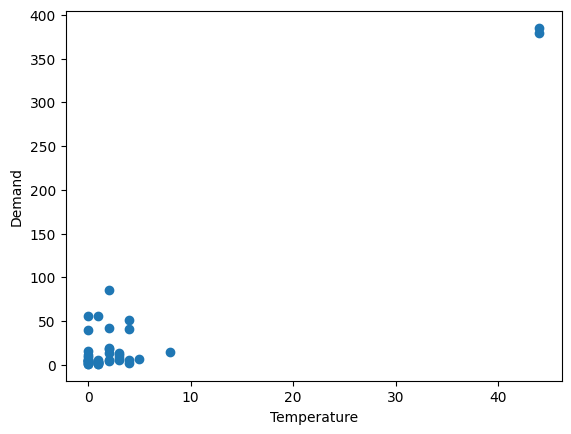

In [48]:
plt.scatter(X,y)
plt.xlabel("Temperature");
plt.ylabel("Demand");
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7)
print('Training set and test set have {} and {} elements respectively'.format(X_train.shape[0],X_test.shape[0]))

Training set and test set have 29 and 13 elements respectively


## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [50]:
lmodel = LinearRegression()
lmodel.fit(X.temp.values.reshape(-1,1), y)
lin = print_eval(X_test, y_test, lmodel)

AttributeError: 'DataFrame' object has no attribute 'temp'